In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [30]:
df=pd.read_csv('hepatitis.csv')
DataFrame=pd.read_csv('hepatitis.csv')
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [31]:
cols=['class','age','sex','steroid','antivirals','fatigue','malaise','anorexia','liver big','liver firm','spleen palpable','spiders','ascites','varices','bilirubin','alk phosphate','sgot','albumin','protime','histology']

In [32]:
df.columns=cols

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            142 non-null    int64  
 1   age              142 non-null    int64  
 2   sex              142 non-null    int64  
 3   steroid          142 non-null    int64  
 4   antivirals       142 non-null    int64  
 5   fatigue          142 non-null    int64  
 6   malaise          142 non-null    int64  
 7   anorexia         142 non-null    int64  
 8   liver big        142 non-null    int64  
 9   liver firm       142 non-null    int64  
 10  spleen palpable  142 non-null    int64  
 11  spiders          142 non-null    int64  
 12  ascites          142 non-null    int64  
 13  varices          142 non-null    int64  
 14  bilirubin        142 non-null    float64
 15  alk phosphate    142 non-null    int64  
 16  sgot             142 non-null    int64  
 17  albumin         

# 1

In [34]:
df.isna().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver big          0
liver firm         0
spleen palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [35]:
df.dropna(inplace=True)
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [36]:
df.replace('?',np.nan,inplace=True)
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [37]:
df.replace('NaN',df.mean(),inplace=True)
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [38]:
df.dropna(inplace=True)
df=df.astype(float)
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2.0,30.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1.0
1,2.0,50.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1.0
2,2.0,78.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1.0
3,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.0,200.0,4.0,61.0,1.0
4,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.0,46.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,7.6,105.0,242.0,3.3,50.0,2.0
138,2.0,44.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,61.0,2.0
139,2.0,61.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,61.0,2.0
140,2.0,53.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2.0


# 2

In [39]:
zv=np.abs((df-df.mean())/df.std())
out=zv >3
df=df[~out.any(axis=1)]
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2.0,30.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.00,85.0,18.0,4.00,61.0,1.0
1,2.0,50.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.90,135.0,42.0,3.50,61.0,1.0
3,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.00,105.0,200.0,4.00,61.0,1.0
4,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.90,95.0,28.0,4.00,75.0,1.0
5,1.0,51.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.42,105.0,85.0,3.81,61.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2.0,36.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.60,120.0,30.0,4.00,61.0,2.0
138,2.0,44.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.90,126.0,142.0,4.30,61.0,2.0
139,2.0,61.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,0.80,75.0,20.0,4.10,61.0,2.0
140,2.0,53.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.50,81.0,19.0,4.10,48.0,2.0


 3 USE LABEL-ENCODER XD ;) WRITE YOUR OWN CODE

In [40]:
Scaler=StandardScaler()
df=Scaler.fit_transform(df)
df

array([[ 0.45935735, -0.94760441,  2.9032002 , ...,  0.29868678,
        -0.091216  , -0.85839508],
       [ 0.45935735,  0.78126611, -0.34444748, ..., -0.58611249,
        -0.091216  , -0.85839508],
       [ 0.45935735, -0.60183031, -0.34444748, ...,  0.29868678,
        -0.091216  , -0.85839508],
       ...,
       [ 0.45935735,  1.73214489, -0.34444748, ...,  0.47564664,
        -0.091216  ,  1.16496475],
       [ 0.45935735,  1.04059669,  2.9032002 , ...,  0.47564664,
        -0.84374799,  1.16496475],
       [-2.17695439,  0.17616143, -0.34444748, ..., -1.2939519 ,
        -1.19107044,  1.16496475]])

# 4

In [41]:
X=DataFrame.drop('histology',axis=1)
y=DataFrame['histology']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=46)


In [43]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [44]:
a1=reg.predict(x_test)
a1

array([1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 1], dtype=int64)

In [45]:
nvg=MultinomialNB()
nvg.fit(x_train,y_train)

MultinomialNB()

In [46]:
a2=nvg.predict(x_test)
a2

array([1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 2], dtype=int64)

In [47]:
nvgg=GaussianNB()
nvgg.fit(x_train,y_train)

GaussianNB()

In [48]:
a3=nvgg.predict(x_test)
a3

array([1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 1], dtype=int64)

In [49]:
z1=accuracy_score(y_test,a1)
z2=accuracy_score(y_test,a2)
z3=accuracy_score(y_test,a3)

In [50]:
print(z1)
print(z2)
print(z3)

0.7241379310344828
0.6206896551724138
0.6896551724137931


# HISTOGRAM

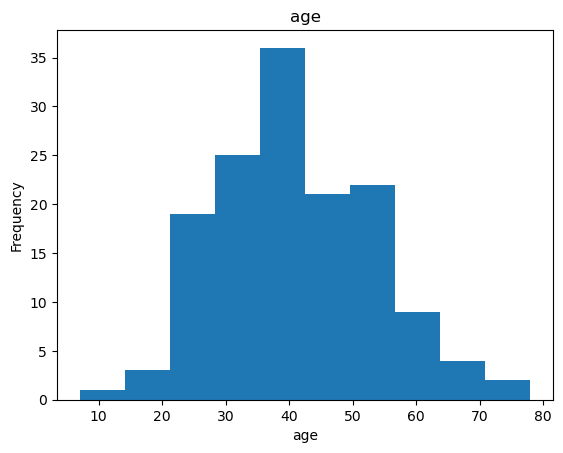

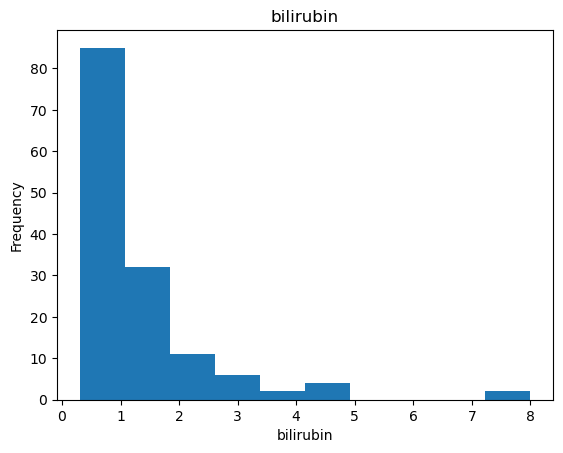

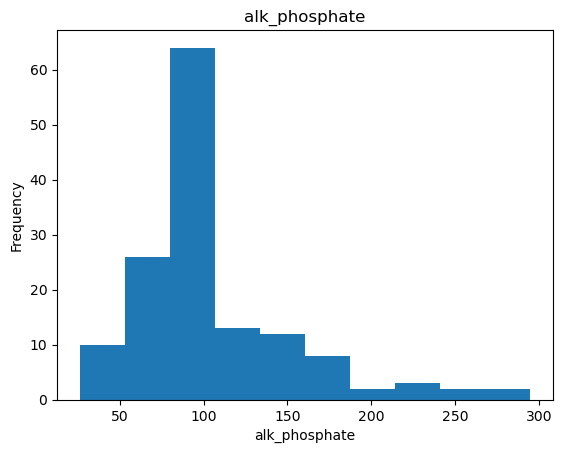

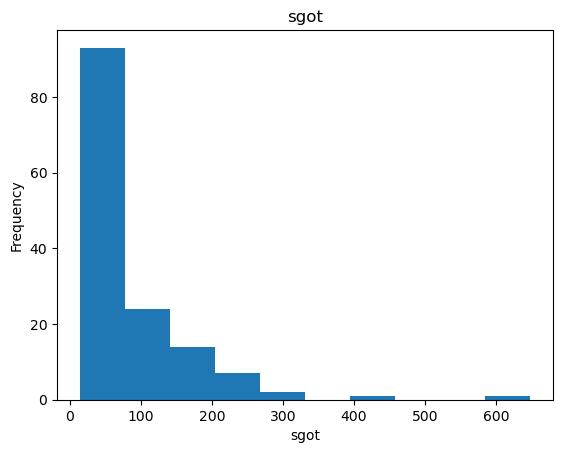

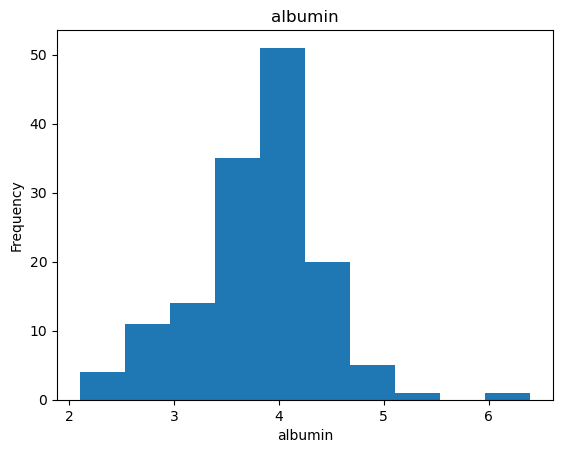

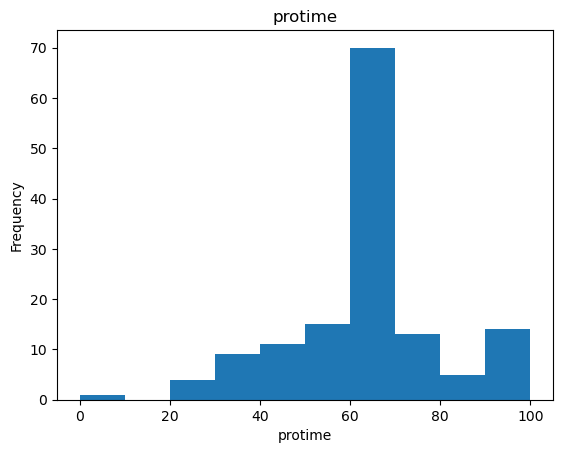

In [51]:
numerical_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
for col in numerical_cols:
    plt.hist(DataFrame[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# BAR PLOT

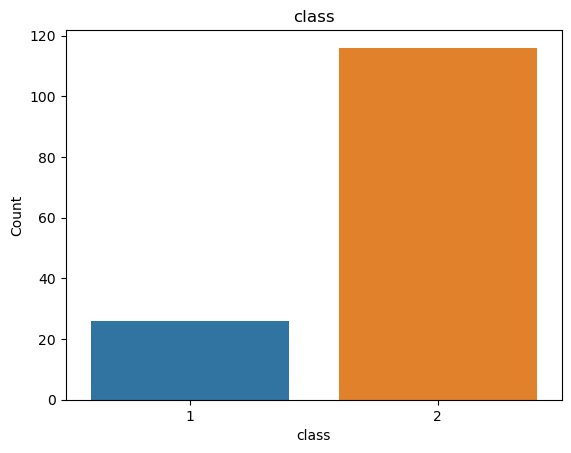

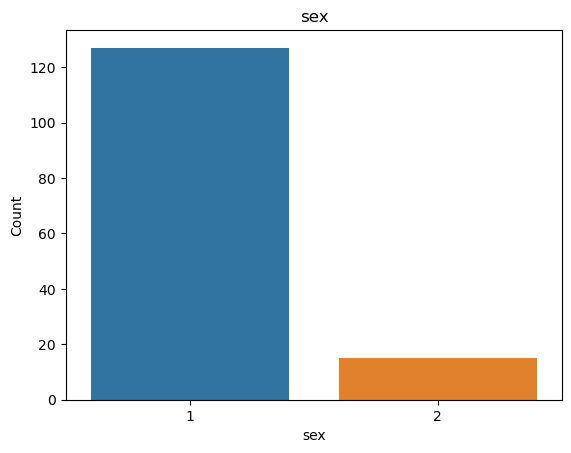

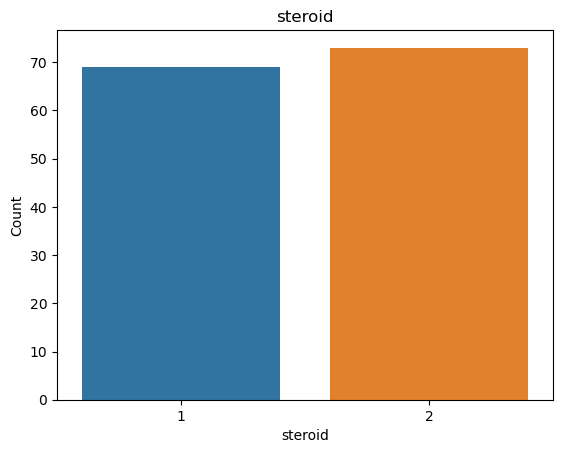

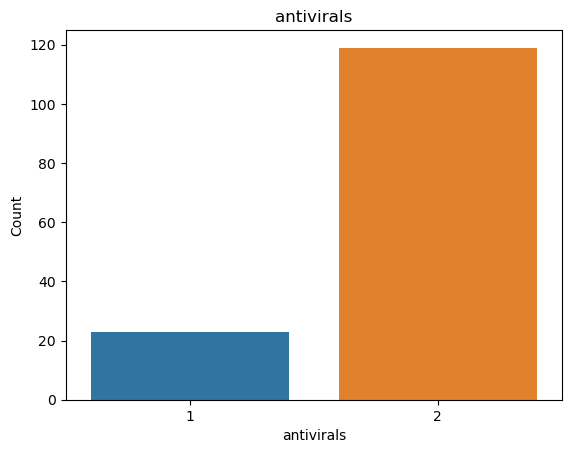

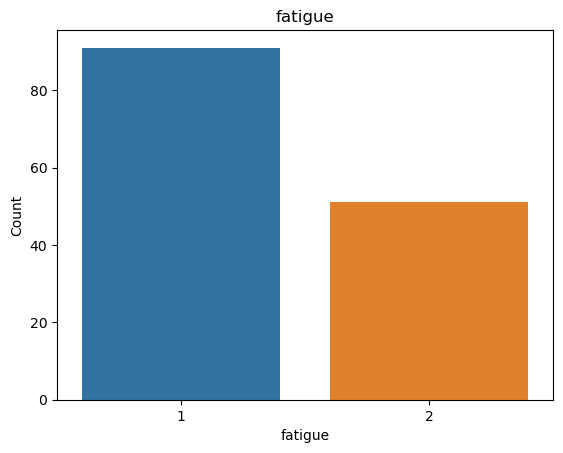

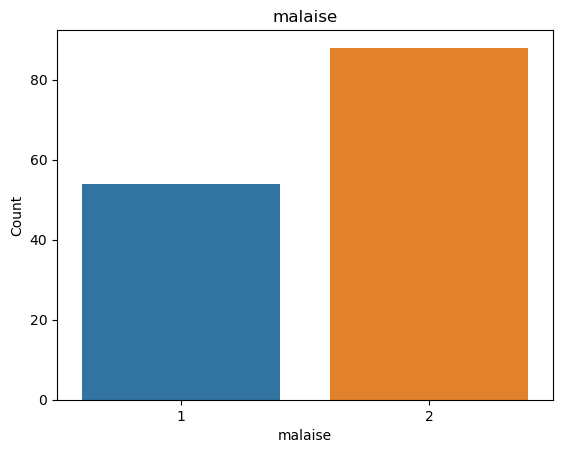

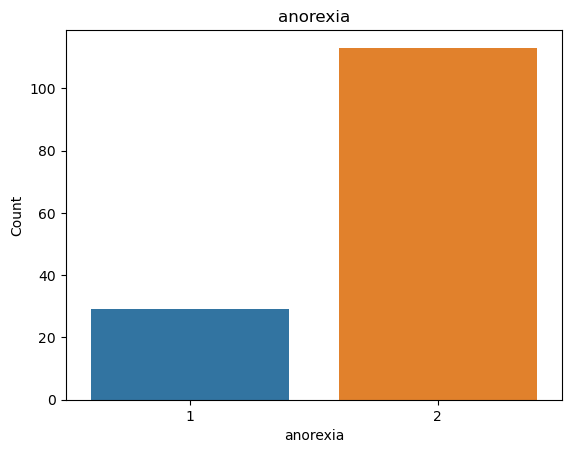

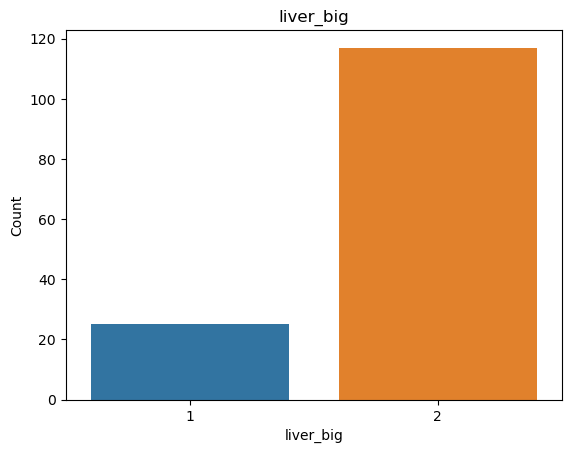

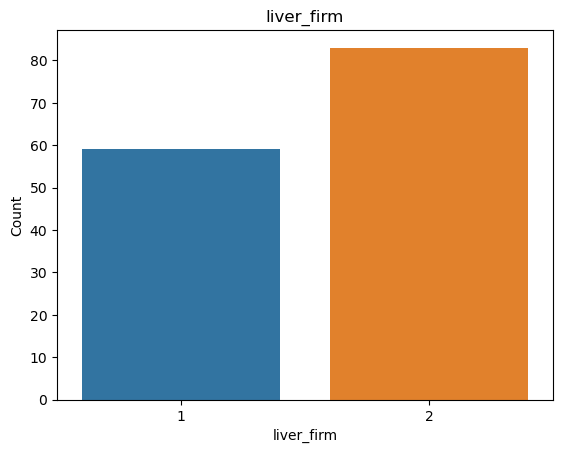

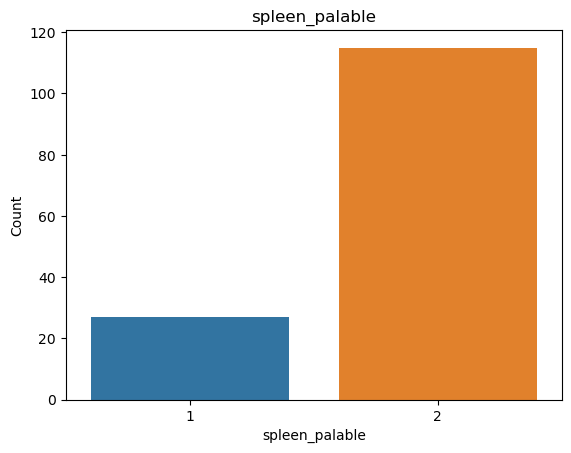

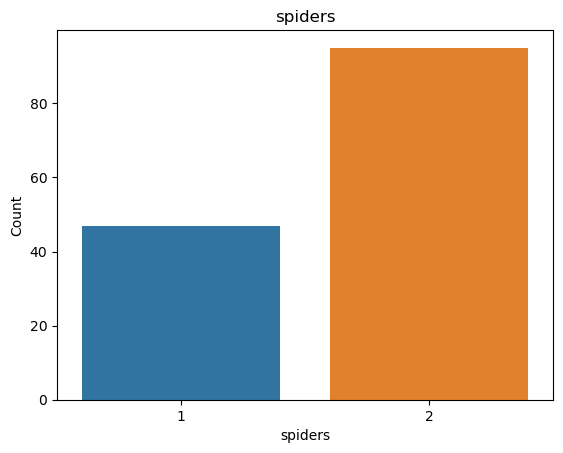

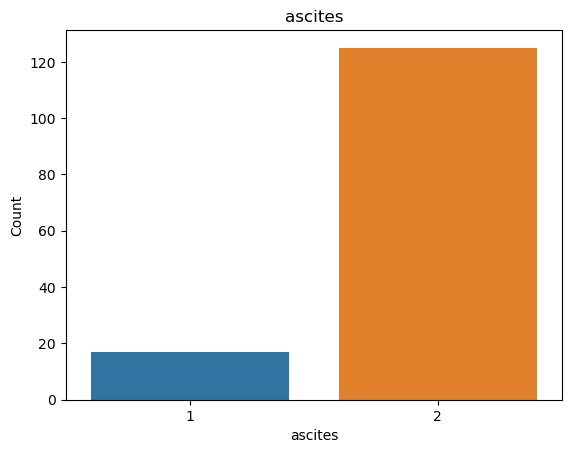

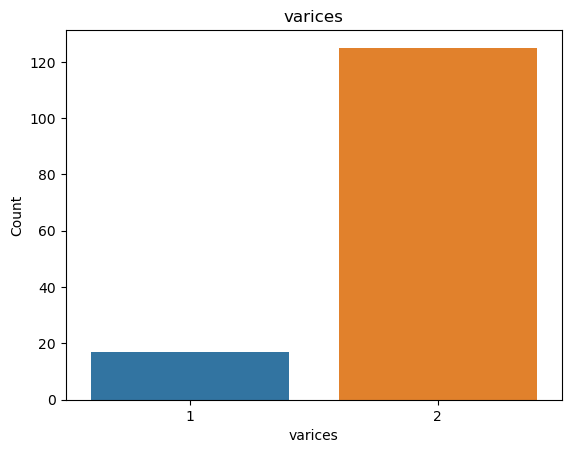

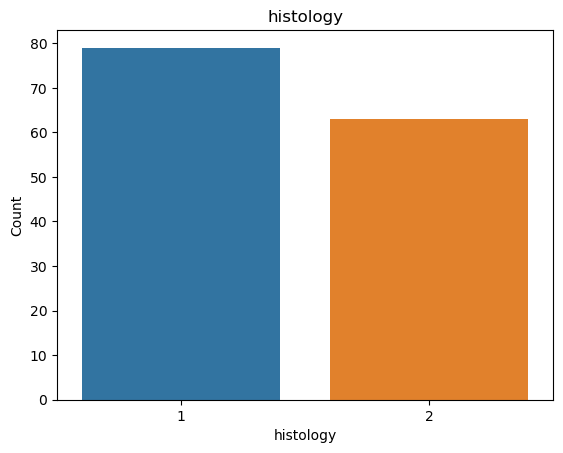

In [52]:
categorical_cols = ['class', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
                    'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites', 'varices', 'histology']
for col in categorical_cols:
    sns.countplot(x=col, data=DataFrame)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# HEATMAP

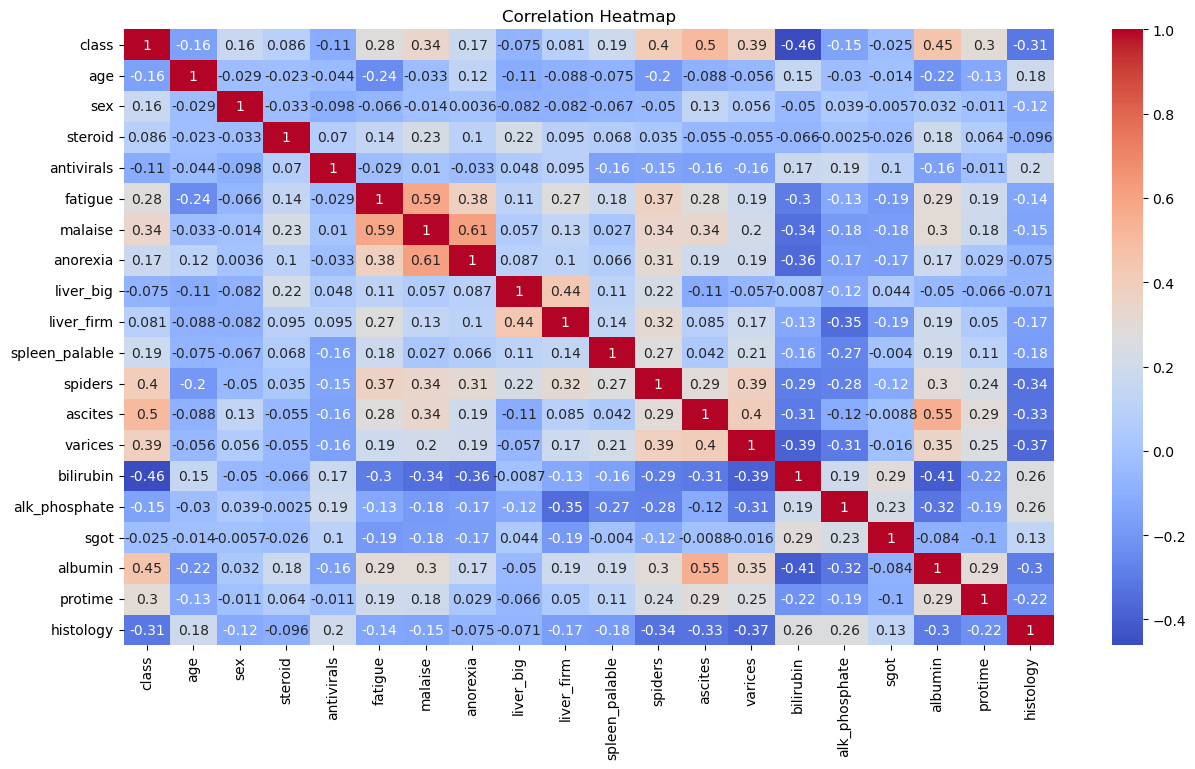

In [53]:
correlation_matrix = DataFrame.corr()

plt.figure(figsize=(15, 8))  # Adjust the size as per your requirement
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

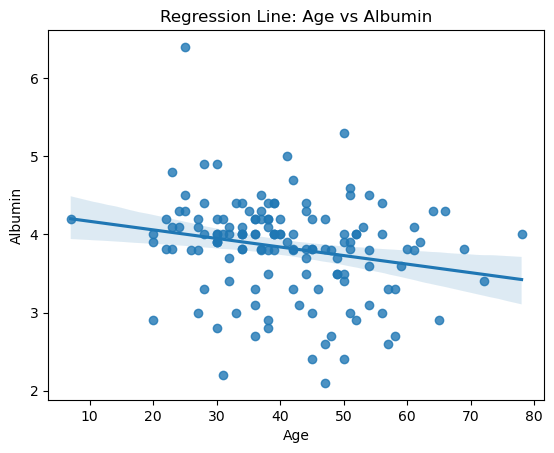

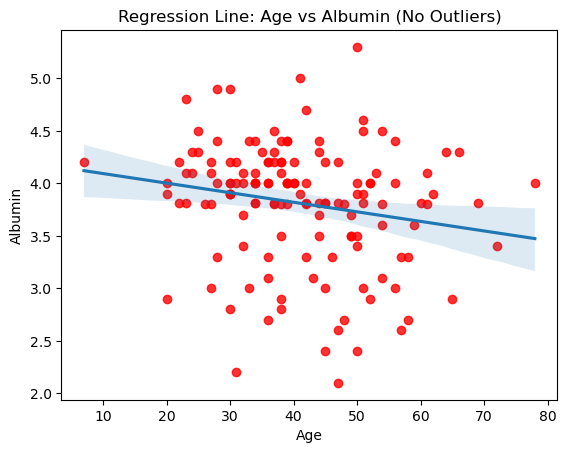

In [54]:
# Fit a regression line
sns.regplot(x='age', y='albumin', data=DataFrame)
plt.title('Regression Line: Age vs Albumin')
plt.xlabel('Age')
plt.ylabel('Albumin')
plt.show()

# Calculate residuals
residuals = DataFrame['albumin'] - DataFrame['albumin'].mean()
std_dev = np.std(residuals)
z_scores = (residuals - np.mean(residuals)) / std_dev

# Define a threshold for outliers (e.g., z-score > 3)
outlier_threshold = 3


# Remove outliers
data_no_outliers = DataFrame[abs(z_scores) <= outlier_threshold]

# Plot data without outliers
sns.regplot(x='age', y='albumin', data=data_no_outliers, scatter_kws={"color": "red"})
plt.title('Regression Line: Age vs Albumin (No Outliers)')
plt.xlabel('Age')
plt.ylabel('Albumin')
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit a regression line with outliers
reg_with_outliers = LinearRegression().fit(DataFrame[['age']], DataFrame['albumin'])
predictions_with_outliers = reg_with_outliers.predict(DataFrame[['age']])
r_squared_with_outliers = r2_score(DataFrame['albumin'], predictions_with_outliers)
print("R-squared (with outliers):", r_squared_with_outliers)

# Fit a regression line without outliers
reg_no_outliers = LinearRegression().fit(data_no_outliers[['age']], data_no_outliers['albumin'])
predictions_no_outliers = reg_no_outliers.predict(data_no_outliers[['age']])
r_squared_no_outliers = r2_score(data_no_outliers['albumin'], predictions_no_outliers)
print("R-squared (without outliers):", r_squared_no_outliers)


R-squared (with outliers): 0.04667488436947498
R-squared (without outliers): 0.036386366299141715
